# Análizar todo lo correspondiente a valores missing

**Revisar el conjuntos de datos**

In [1]:
import pandas as pd

In [156]:
# cargamos la data
import pandas as pd

data = pd.read_excel("CHURNM.xlsx")
data.head()

,IdCliente,Genero,Mayor65Age,Socio,Dependientes,MultipleLineas,Internet,TVPago,TerminoContrato,FactElectronica,MetodoPago,CargoMensual,ImporteTotal,pemanencia,ServicioTel,Churn
0,7590-VHVEG,Femenino,0,Si,No,No servicio tel,DSL,No,Mes a mes,Si,Cheque electronico,29.85,29.85,1.0,No,No
1,5575-GNVDE,Masculino,0,No,No,No,DSL,No,Un año,No,Cheque fisico,NaN,1889.50,34.0,Si,No
2,3668-QPYBK,Masculino,0,No,No,No,DSL,No,Mes a mes,Si,Cheque fisico,53.85,108.15,2.0,Si,Si
3,7795-CFOCW,Masculino,0,No,No,No servicio tel,DSL,No,Un año,No,TransfBanca (automatica),42.30,1840.75,45.0,NaN,No
4,9237-HQITU,Femenino,0,No,No,No,Fibra Optica,No,Mes a mes,Si,Cheque electronico,70.70,151.65,2.0,Si,Si


In [51]:
#Comprobar el directorio de trabajo 
import os
os.getcwd()

'C:\\Users\\lenovo\\Documents\\GitHub\\Analisis-Multivariado\\SESIONES\\Sesión 03'

## Análisis Exploratorio

In [11]:
# Vemos el nombre las columnas
data.columns

Index(['IdCliente', 'Genero', 'Mayor65Age', 'Socio', 'Dependientes',
       'MultipleLineas', 'Internet', 'TVPago', 'TerminoContrato',
       'FactElectronica', 'MetodoPago', 'CargoMensual', 'ImporteTotal',
       'pemanencia', 'ServicioTel', 'Churn'],
      dtype='object')

In [10]:
# Vemos cuantas filas y columnas contiene nuestro data
data.shape

(7043, 16)

In [14]:
# lista de los tipos de datos para cada columna
data.dtypes

IdCliente           object
Genero              object
Mayor65Age           int64
Socio               object
Dependientes        object
MultipleLineas      object
Internet            object
TVPago              object
TerminoContrato     object
FactElectronica     object
MetodoPago          object
CargoMensual       float64
ImporteTotal       float64
pemanencia         float64
ServicioTel         object
Churn               object
dtype: object

In [12]:
# Descripción estadística de los datos numéricos
data.describe()

,Mayor65Age,CargoMensual,ImporteTotal,pemanencia
count,7043.000000,6479.000000,6439.000000,6327.000000
mean,0.162147,64.735739,2293.121020,32.387387
std,0.368612,30.079019,2275.377016,24.553224
min,0.000000,18.250000,18.850000,0.000000
25%,0.000000,35.450000,402.550000,9.000000
50%,0.000000,70.350000,1411.350000,29.000000
75%,0.000000,89.900000,3798.375000,55.000000
max,1.000000,118.750000,8684.800000,72.000000


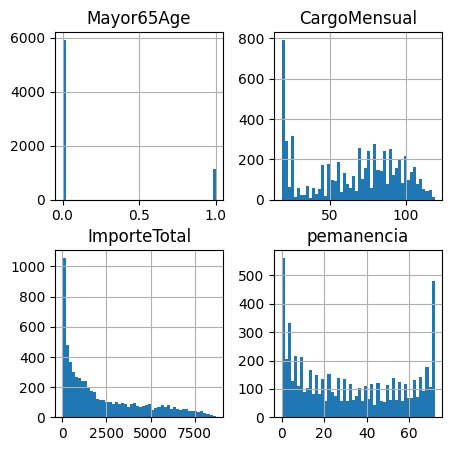

In [84]:
# distribuciones de las variables
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(5,5))
plt.show()

In [73]:
#Encontremos la categoría mas frecuente en la variable no numericas
data[['Socio','Dependientes', 'MultipleLineas', 'Internet', 'TVPago', 'TerminoContrato', 'FactElectronica', 
      'MetodoPago','ServicioTel','Churn']].mode()

,Socio,Dependientes,MultipleLineas,Internet,TVPago,TerminoContrato,FactElectronica,MetodoPago,ServicioTel,Churn
0,No,No,No,Fibra Optica,No,Mes a mes,Si,Cheque electronico,Si,No


In [70]:
# vemos los métodos de pago y la cantidad ve valores para cada uno
data['MetodoPago'].value_counts()

Cheque electronico             2365
Cheque fisico                  1612
TransfBanca (automatica)       1544
TarjetaCredito (automatico)    1522
Name: MetodoPago, dtype: int64

In [40]:
# Tabla de contingencia class / survived
pd.crosstab(index=data['Genero'], columns=data['MetodoPago'], margins=True)

MetodoPago,Cheque electronico,Cheque fisico,TarjetaCredito (automatico),TransfBanca (automatica),All
Genero,,,,,
Femenino,1170,778,752,788,3488
Masculino,1195,834,770,756,3555
All,2365,1612,1522,1544,7043


In [62]:
# Tabla de fracuencia de la variable "MetodoPago"
data.stb.freq(['MetodoPago'])

,MetodoPago,count,percent,cumulative_count,cumulative_percent
0,Cheque electronico,2365,33.579441,2365,33.579441
1,Cheque fisico,1612,22.887974,3977,56.467414
2,TransfBanca (automatica),1544,21.922476,5521,78.389891
3,TarjetaCredito (automatico),1522,21.610109,7043,100.000000


## VERIFICACIÓN DE VALORES MISSING

**Vamos a tratar de identificar los valores que faltan de 5 formas distintas:**

- Con el método missing.
- Con la función isnull de pandas
- Con el método info de pandas
- Con un gráfico de barras
- Con un mapa de calor seaborn

In [59]:
# Usando método missing
data.stb.missing()

,missing,total,percent
ServicioTel,724,7043,10.279710
pemanencia,716,7043,10.166122
ImporteTotal,604,7043,8.575891
CargoMensual,564,7043,8.007951
IdCliente,0,7043,0.000000
Genero,0,7043,0.000000
Mayor65Age,0,7043,0.000000
Socio,0,7043,0.000000
Dependientes,0,7043,0.000000
MultipleLineas,0,7043,0.000000


In [66]:
# suma de valores perdidos
data.isnull().sum()

IdCliente            0
Genero               0
Mayor65Age           0
Socio                0
Dependientes         0
MultipleLineas       0
Internet             0
TVPago               0
TerminoContrato      0
FactElectronica      0
MetodoPago           0
CargoMensual       564
ImporteTotal       604
pemanencia         716
ServicioTel        724
Churn                0
dtype: int64

In [52]:
# Visualizamos la información de DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdCliente        7043 non-null   object 
 1   Genero           7043 non-null   object 
 2   Mayor65Age       7043 non-null   int64  
 3   Socio            7043 non-null   object 
 4   Dependientes     7043 non-null   object 
 5   MultipleLineas   7043 non-null   object 
 6   Internet         7043 non-null   object 
 7   TVPago           7043 non-null   object 
 8   TerminoContrato  7043 non-null   object 
 9   FactElectronica  7043 non-null   object 
 10  MetodoPago       7043 non-null   object 
 11  CargoMensual     6479 non-null   float64
 12  ImporteTotal     6439 non-null   float64
 13  pemanencia       6327 non-null   float64
 14  ServicioTel      6319 non-null   object 
 15  Churn            7043 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 880.5+ KB


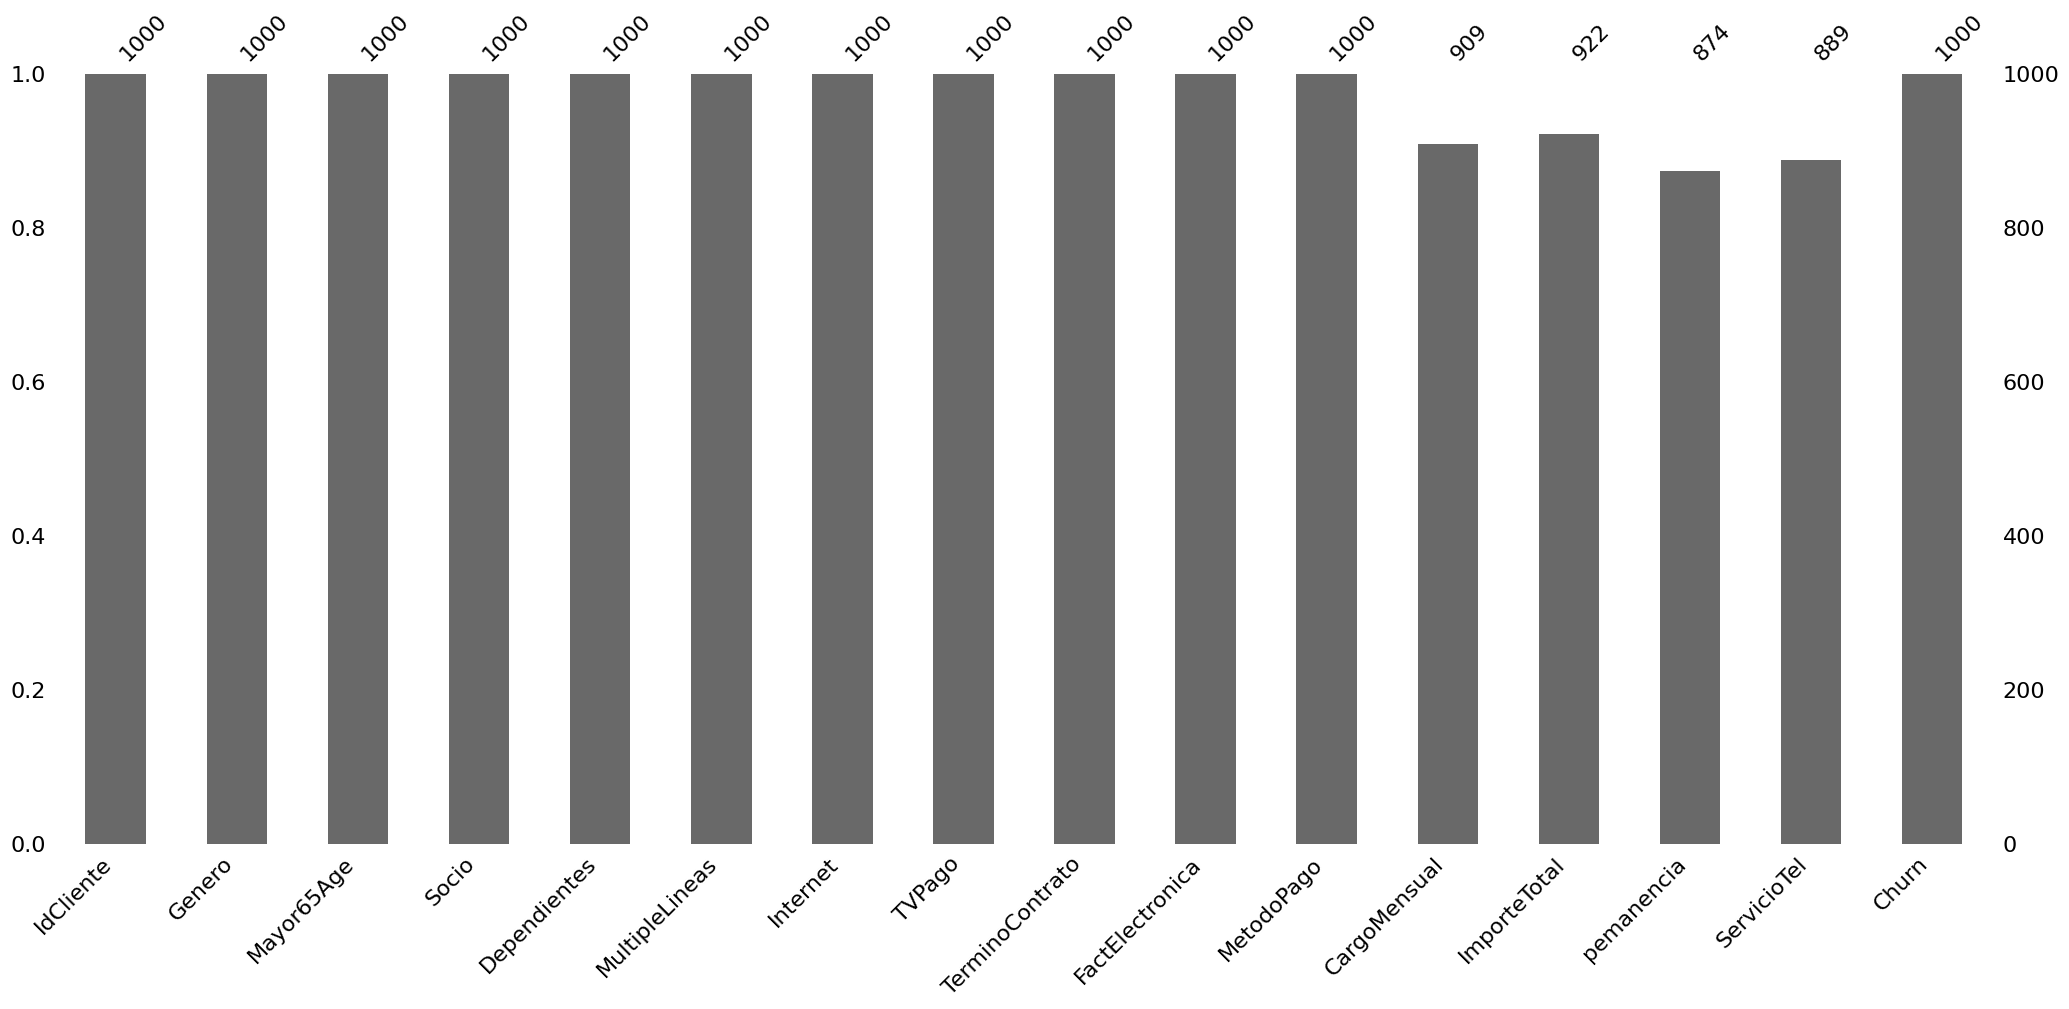

In [44]:
# Gráfico de barras
import missingno as msno
msno.bar(data.sample(1000));

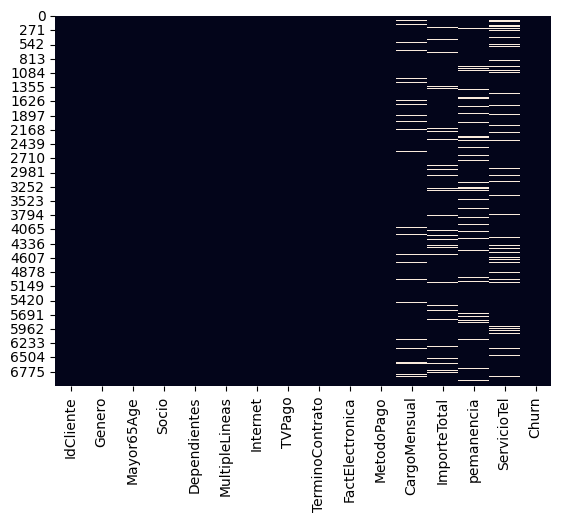

In [45]:
# Con un mapa de calor seaborn
sns.heatmap(data.isnull(), cbar=False);

## Tratamiento de missing - Imputación

###  Eliminar valores perdidos

In [136]:
imput_drop = data.dropna()

In [137]:
print(imput_drop.shape)
imput_drop.tail()

(4787, 16)


,IdCliente,Genero,Mayor65Age,Socio,Dependientes,MultipleLineas,Internet,TVPago,TerminoContrato,FactElectronica,MetodoPago,CargoMensual,ImporteTotal,pemanencia,ServicioTel,Churn
7034,0639-TSIQW,Femenino,0,No,No,Si,Fibra Optica,Si,Mes a mes,Si,TarjetaCredito (automatico),102.95,6886.25,67.0,Si,Si
7035,8456-QDAVC,Masculino,0,No,No,No,Fibra Optica,Si,Mes a mes,Si,TransfBanca (automatica),78.70,1495.10,19.0,Si,No
7038,6840-RESVB,Masculino,0,Si,Si,Si,DSL,Si,Un año,Si,Cheque fisico,84.80,1990.50,24.0,Si,No
7040,4801-JZAZL,Femenino,0,Si,Si,No servicio tel,DSL,No,Mes a mes,Si,Cheque electronico,29.60,346.45,11.0,No,No
7042,3186-AJIEK,Masculino,0,No,No,No,Fibra Optica,Si,Dos años,Si,TransfBanca (automatica),105.65,6844.50,66.0,Si,No


### Medidas de Tendencia Central

In [120]:
imput_clasico = data.copy()

In [105]:
numerica = imput_clasico.select_dtypes(include=["number"]) #Filtramos las columnas numericas
print("Numericas\n",numerica.columns)

cadena = imput_clasico.select_dtypes(include=["object"]) # Filtramos las columnas no numericas
print("Cadenas\n",cadena.columns)

Numericas
 Index(['Mayor65Age', 'CargoMensual', 'ImporteTotal', 'pemanencia'], dtype='object')
Cadenas
 Index(['IdCliente', 'Genero', 'Socio', 'Dependientes', 'MultipleLineas',
       'Internet', 'TVPago', 'TerminoContrato', 'FactElectronica',
       'MetodoPago', 'ServicioTel', 'Churn'],
      dtype='object')


### K - Vecinos más Cercanos (KNN)

**pasos**
- Calcular la distancia
- Encontrar sus vecinos más cercanos
- Votar por las etiquetas

In [134]:
!pip install sklearn #missingpy

ERROR: Invalid requirement: '#missingpy'


In [140]:
# missingpy import KNNImputer
from sklearn.impute import SimpleImputer